In [1]:
import numpy as np

flux = np.load("korg_flux_4700.0_4750.0.npz")
wls = np.load("korg_wavelengths_4700.0_4750.0.npz")

print(flux.files)  # ['R0', 'R2000', 'R10000', 'R30000', 'R100000']

['2000', '100000', '30000', '10000', '0']


In [2]:
import jax
jax.config.update("jax_enable_x64", True)
from spice.spectrum.utils import apply_spectral_resolution
import jax.numpy as jnp

spice_flux = {}
for R in [2000, 10000, 30000, 100000]:
    spice_flux[R] = 1.0 - apply_spectral_resolution(jnp.log10(jnp.array(wls[f'{R}'])), 1.0 - jnp.array(flux['0']), R)

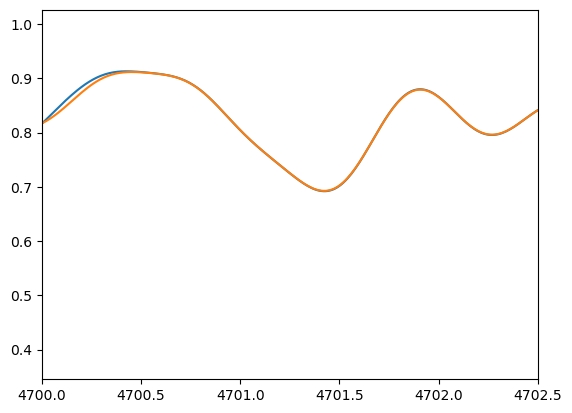

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.plot(wls['10000'], flux['10000'])
plt.plot(wls['10000'], spice_flux[10000])
plt.gca().set_xlim(4700, 4702.5)
plt.show()

Maximum residuals for each resolution:
R =    2000: 0.082911
R =   10000: 0.087672
R =   30000: 0.085446
R =  100000: 0.072998


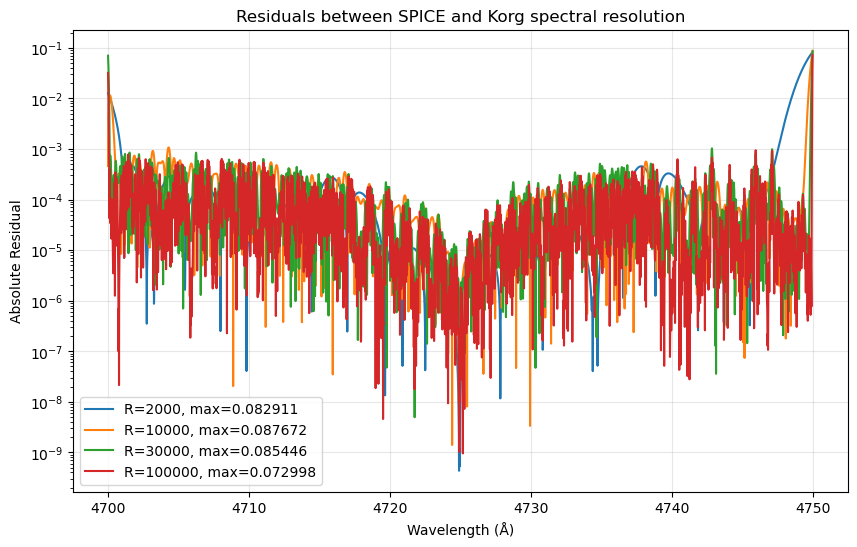

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure to compare residuals across different resolutions
plt.figure(figsize=(10, 6))

# Dictionary to store max residuals for each resolution
max_residuals = {}

# Loop through each resolution and calculate residuals
for R in ([2000, 10000, 30000, 100000]): #, 50000, 100000, 1000000]:
    # Calculate residuals between SPICE and Korg
    residuals = np.abs(spice_flux[R] - np.array(flux[f'{R}']))
    max_residual = np.max(residuals)
    max_residuals[R] = max_residual
    
    # Plot the residuals
    plt.plot(wls[f'{R}'], residuals, label=f'R={R}, max={max_residual:.6f}')

plt.xlabel('Wavelength (Å)')
plt.ylabel('Absolute Residual')
plt.title('Residuals between SPICE and Korg spectral resolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to better visualize differences

# Print a summary of max residuals
print("Maximum residuals for each resolution:")
for R in sorted(max_residuals.keys()):
    print(f"R = {R:7d}: {max_residuals[R]:.6f}")
